**IMPOARTANT**

So far, the python code in this notebook can run in the 'base' conda environment and may accounter errors when is executed in 'steps' enviroment.

Following notes applied to the data file in directory './data'

1. Data file naming

a. PHE_data_[ramp/step].csv

Pinjarra Hills Experimental data file for ramp/step case, provided by Hugh as recorded in Test 807 / Test 809 which are saved in project's document directories. Remove the suffix '_[ramp/step]' to make it as the input for the Jupyter notebook '../plot_data.ipynb'.

b. TestDyn_PCHE_PHE_data_[ramp/step]_YYYY_MM_DD.csv

Simulation output generated by Modelica program. Naming of these files follows the Modelica program 'TestDyn_PCHE_PHE_[ramp/step].mo`. 'YYYY_MM_DD' in the data files denotes the date when they were generated. Remove suffix '_[ramp/step]_YYYY_MM_DD' to make it the input of the Jupyter notebook '../plot_data.ipynb'

2. Short description and parameters of simulation

- TestDyn_PCHE_PHE_data_step_2021_03_10.csv

Step case - step change of Hot oil input.

Dittus-Boelter Nu correlations used. 

Geometry parameters are given by Hugh. (Nt = 100 not 2400)

In [48]:
import csv

key_ds1 = ['time','T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T', 'T_waterIn.inlet.m_flow', 'T_waterOut.inlet.m_flow', 'T_gasOut.inlet.m_flow', 'T_gasIn.inlet.m_flow']
key_ds2 = ['time_t','RecupHP_out_T', 'Turbine_in_T','HotOil_Evap_in_T', 'HotOil_Evap_out_T', 'RecupHP_out_P', 'Turbine_in_P','Cycle_Mdot','HotOil_Mdot']
key_mock_input = ['time_mock', 'HotOil_Evap_in_T', 'HotOil_Mdot']

# ds = {k:[] for k in key_ds1}
ds = {**{k:[] for k in key_ds1}, **{k:[] for k in key_ds2}}
# ds_mock = {** {k:[] for k in key_mock_input}}

with open('data/TestDyn_PCHE_PHE_data.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds1:
            v = float(row[k])
            if k in {'T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T'}:
                v = v - 273.15
            ds[k].append(v)
                
            
with open('data/PHE_data.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds2:
            ds[k].append(float(row[k]))                
            
# with open('PHE_input.csv', newline='') as data_file:
#     reader = csv.DictReader(data_file)
    
#     for row in reader:
#         for k in key_mock_input:
#             v = float(row[k])
#             ds_mock[k].append(v)
            


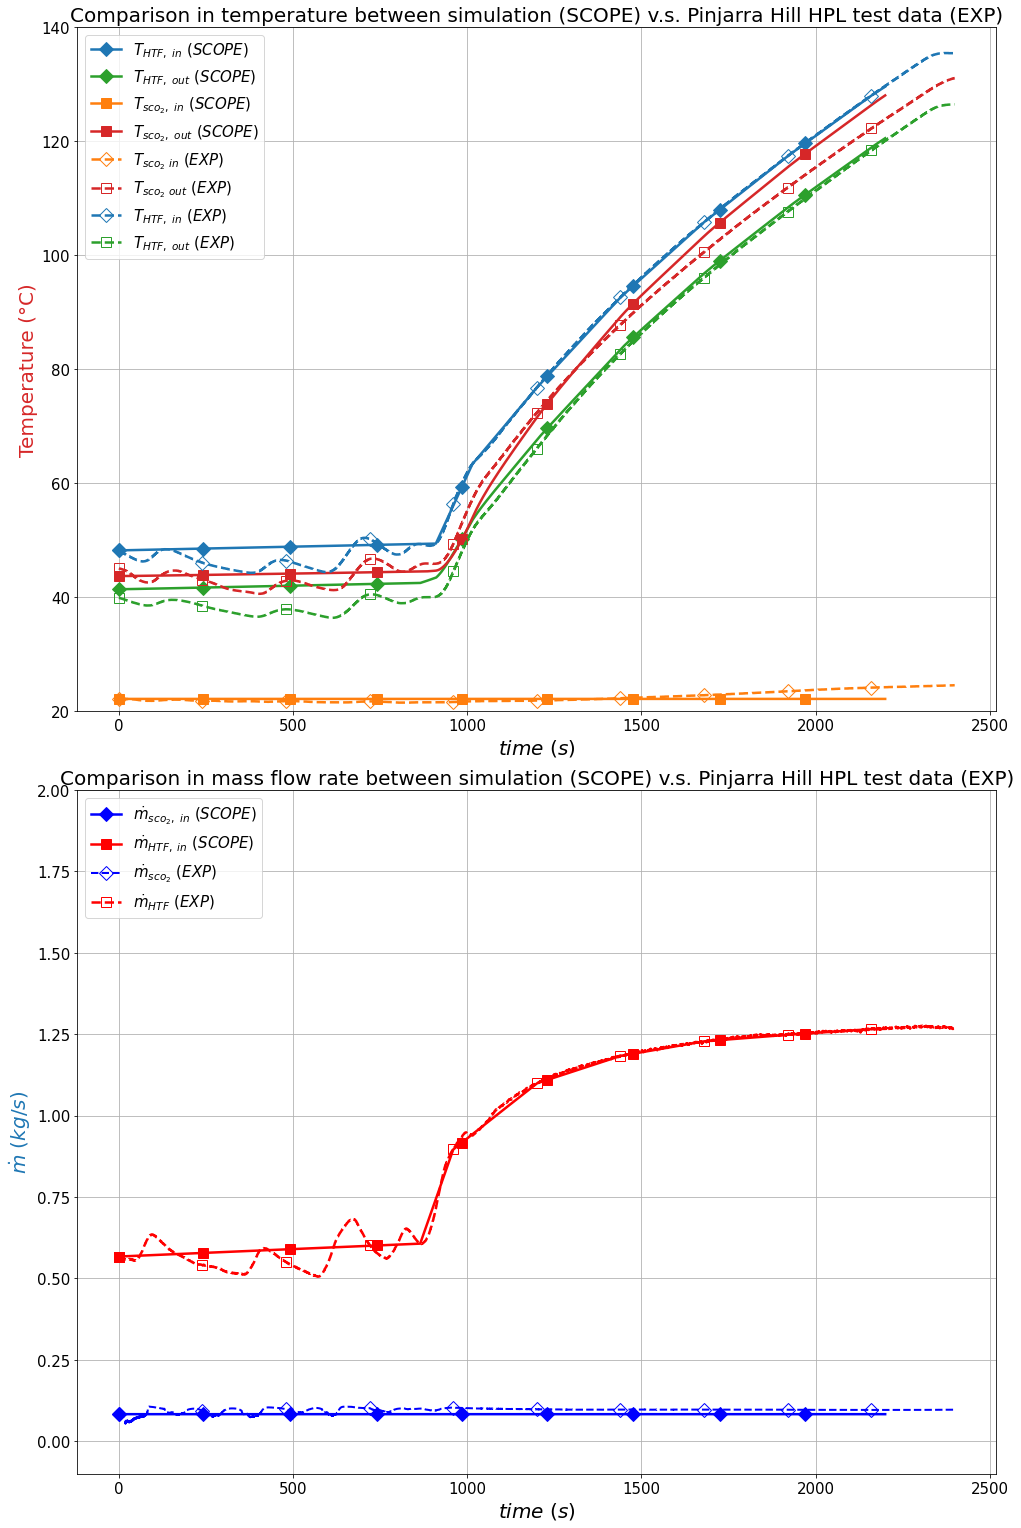

In [66]:
import matplotlib # kernel for proper conda env required. 
import matplotlib.pyplot as plt
import numpy as np

px = 1 / plt.rcParams['figure.dpi'] # pixel in inches
fig, axs = plt.subplots(2, 1, figsize=(1024*px, 768*2*px))
dict_line = {}
markersize = 10
line_width = 2.5

cfg_lines = {
    'T_gasIn.T':
    {
        'color': 'tab:blue',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$T_{HTF,~in}~(SCOPE)$',
        'markersize': markersize,
        'marker': 'D'
    },
    'T_gasOut.T':
    {
        'color': 'tab:green',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$T_{HTF,~out}~(SCOPE)$',
        'markersize': markersize,
        'marker': 'D'
    },
    'T_waterIn.T':
    {
        'color': 'tab:orange',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$T_{sco_2,~in}~(SCOPE)$',
        'markersize': markersize,
        'marker': 's'
    },
    'T_waterOut.T':
    {
        'color': 'tab:red',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$T_{sco_2,~out}~(SCOPE)$',
        'markersize': markersize,
        'marker': 's'
    },
    'RecupHP_out_T':
    {
        'color': 'tab:orange',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$T_{sco_2~in}~(EXP)$',
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 'D'   
    },
    'Turbine_in_T':
    {
        'color': 'tab:red',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$T_{sco_2~out}~(EXP)$',
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 's'
    },
    'HotOil_Evap_in_T':
    {
        'color': 'tab:blue',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$T_{HTF,~in}~(EXP)$',
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 'D'   
    },
    'HotOil_Evap_out_T':
    {
        'color': 'tab:green',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$T_{HTF,~out}~(EXP)$',
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 's'
    }      
}

for k in ['T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T']:
    cfg_line = cfg_lines[k]
    l, = axs[0].plot(ds['time'], ds[k], markevery=200, **cfg_line)    
    dict_line[k]  = l

for k in ['RecupHP_out_T', 'Turbine_in_T','HotOil_Evap_in_T', 'HotOil_Evap_out_T']:       
    cfg_line = cfg_lines[k]
    l, = axs[0].plot(ds['time_t'], ds[k], markevery=1200, **cfg_line)  
    dict_line[k] = l
    
# plot the mock input
# l, = ax.plot(ds_mock['time_mock'], ds_mock['HotOil_Evap_in_T'], '-*',markevery=1200)
   
    
color = 'tab:red'    
axs[0].set_xlabel('$time~(s)$', fontsize=20)
axs[0].set_ylabel('Temperature (°C)', color=color, fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=15)
axs[0].yaxis.set_tick_params(labelsize=15)
axs[0].set_ylim([20,140])
axs[0].set_title("Comparison in temperature between simulation (SCOPE) v.s. Pinjarra Hill HPL test data(EXP)", fontsize=20)
axs[0].grid()
axs[0].legend(loc='upper left', fontsize=15)

# ax2 = ax.twinx()
color = 'tab:blue'

cfg_lines = {
    'T_waterIn.inlet.m_flow':
    {
        'color': 'b',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$\dot{m}_{sco_2,~in}~(SCOPE)$',
        'markersize': markersize,
        'marker': 'D'
    },
    'T_waterOut.inlet.m_flow':
    {
        'color': 'b',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$\dot{m}_{sco_2,~out}~(SCOPE)$',
        'markersize': markersize,
        'marker': 'D'
    },
    'T_gasOut.inlet.m_flow':
    {
        'color': 'r',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$\dot{m}_{HTF,~in}~(SCOPE)$',
        'markersize': markersize,
        'marker': 's'
    },
    'T_gasIn.inlet.m_flow':
    {
        'color': 'r',
        'linestyle': '-',
        'linewidth': line_width,
        'label': '$\dot{m}_{HTF,~out}~(SCOPE)$',
        'markersize': markersize,
        'marker': 's'
    },
    'Cycle_Mdot':
    {
        'color': 'b',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$\dot{m}_{sco_2}~(EXP)$',
        'linewidth': 2,
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 'D'   
    },
    'HotOil_Mdot':
    {
        'color': 'r',
        'linestyle': '--',
        'linewidth': line_width,
        'label': '$\dot{m}_{HTF}~(EXP)$',
        'markersize': markersize,
        'markerfacecolor': 'none',
        'marker': 's'
    }    
}

# Only the inlet quantity will be plotted since they are equal to each other    
for k in ['T_waterIn.inlet.m_flow', 'T_gasOut.inlet.m_flow']:
    cfg_line = cfg_lines[k]
    l, = axs[1].plot(ds['time'], ds[k], markevery=200, **cfg_line)
    dict_line[k] = l

for k in ['Cycle_Mdot','HotOil_Mdot']:
    cfg_line = cfg_lines[k]
    l, = axs[1].plot(ds['time_t'], ds[k], markevery=1200, **cfg_line)
    dict_line[k] = l   
    
# plot the mock mdot
# l, = ax2.plot(ds_mock['time_mock'], ds_mock['HotOil_Mdot'], '-*',markevery=1200)

axs[1].set_xlabel('$time~(s)$', fontsize=20)
axs[1].set_ylabel('$\dot{m}~(kg/s)$', color=color, fontsize=20)
axs[1].xaxis.set_tick_params(labelsize=15)
axs[1].yaxis.set_tick_params(labelsize=15)
axs[1].set_ylim([-0.1,2])
axs[1].set_title("Comparison in mass flow rate between simulation (SCOPE) v.s. Pinjarra Hill HPL test data (EXP)", fontsize=20)
axs[1].grid()
axs[1].legend(loc='upper left', fontsize=15)

# fig.legend(dict_line.values() ,dict_line.keys(), 'upper right')
fig.tight_layout()
fig.patch.set_facecolor((1, 1, 1))

fig.savefig("test.png")
plt.show()

# fig.legend(dict_line.values() ,dict_line.keys(), 'upper right')
fig.tight_layout()
fig.patch.set_facecolor((1, 1, 1))

fig.savefig("test.png")
plt.show()
# fig.legend(dict_line.values() ,dict_line.keys(), 'upper right')
fig.tight_layout()
fig.patch.set_facecolor((1, 1, 1))

fig.savefig("test.png")
plt.show()